## Justin Sandbox

In [3]:
# Import linraries and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 
import calendar


In [12]:
conn = sqlite3.connect('../data/im.db')

In [ ]:
pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn)

In [ ]:
df_dirs = pd.read_sql("""
 SELECT *
    FROM 
    movie_basics AS mb
        LEFT JOIN
            (SELECT *
            FROM directors GROUP BY movie_id) AS dr
            ON mb.movie_id = dr.movie_id
""", conn)

In [13]:
df_imdb = pd.read_sql("""
    SELECT *
    FROM 
    movie_basics AS mb
        LEFT JOIN movie_ratings AS mr
            ON mb.movie_id = mr.movie_id
        LEFT JOIN
            (SELECT *
            FROM directors GROUP BY movie_id) AS dr
            ON mb.movie_id = dr.movie_id
        LEFT JOIN persons AS ps
            ON dr.person_id = ps.person_id
""", conn)

In [ ]:
df_dirs.info()

In [22]:
df_dirs.head()

NameError: name 'df_dirs' is not defined

In [23]:
df_imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,person_id,person_id,primary_name,birth_year,death_year,primary_profession,rating_relative_to_avg,Genre_1,Genre_2,Genre_3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,nm0712540,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",0.667271,Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0,tt0066787,nm0002411,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor",0.867271,Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0,tt0069049,nm0000080,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer",0.567271,Drama,None,None
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13.0,tt0069204,nm0611531,nm0611531,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer",-0.232729,Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119.0,tt0100275,nm0765384,nm0765384,Valeria Sarmiento,1948.0,NaN,"editor,director,writer",0.167271,Comedy,Drama,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,None,NaN,NaN,tt9916538,nm8185151,nm8185151,Azhar Kinoi Lubis,NaN,NaN,director,NaN,Drama,None,None
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,None,NaN,NaN,tt9916622,nm9272490,nm9272490,Angela Gurgel,NaN,NaN,"director,writer",NaN,Documentary,None,None
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,None,NaN,NaN,tt9916706,nm7764440,nm7764440,Kanchan Nayak,NaN,NaN,director,NaN,Comedy,None,None
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,None,NaN,NaN,tt9916730,nm10538612,nm10538612,Kiran Gawade,NaN,NaN,None,NaN,None,None,None


In [44]:
df_imdb[df_imdb['primary_title'].str.contains("Avatar")].sort_values('primary_title')

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,...,primary_name,birth_year,death_year,primary_profession,rating_relative_to_avg,Genre_1,Genre_2,Genre_3,year_str,mov_yr_key
20368,tt1854506,Aliens vs. Avatars,Aliens vs. Avatars,2011,80.0,"Horror,Sci-Fi",tt1854506,1.6,1544.0,tt1854506,...,Lewis Schoenbrun,NaN,NaN,"editor,editorial_department,miscellaneous",-4.732729,Horror,Sci-Fi,None,2011,Aliens vs. Avatars-2011
17060,tt1775309,Avatar,Abatâ,2011,93.0,Horror,tt1775309,6.1,43.0,tt1775309,...,Atsushi Wada,NaN,NaN,director,-0.232729,Horror,None,None,2011,Avatar-2011
11392,tt1630029,Avatar 2,Avatar 2,2021,NaN,"Action,Adventure,Fantasy",None,NaN,NaN,tt1630029,...,James Cameron,1954.0,NaN,"writer,producer,director",NaN,Action,Adventure,Fantasy,2021,Avatar 2-2021
16337,tt1757678,Avatar 3,Avatar 3,2023,NaN,"Action,Adventure,Drama",None,NaN,NaN,tt1757678,...,James Cameron,1954.0,NaN,"writer,producer,director",NaN,Action,Adventure,Drama,2023,Avatar 3-2023
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy",None,NaN,NaN,tt3095356,...,James Cameron,1954.0,NaN,"writer,producer,director",NaN,Action,Adventure,Fantasy,2025,Avatar 4-2025
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy",None,NaN,NaN,tt5637536,...,James Cameron,1954.0,NaN,"writer,producer,director",NaN,Action,Adventure,Fantasy,2027,Avatar 5-2027
77990,tt4472992,Avatarachi Goshta,Avatarachi Goshta,2014,118.0,Drama,tt4472992,7.9,21.0,tt4472992,...,Nitin Dixit,NaN,NaN,"writer,director,actor",1.567271,Drama,None,None,2014,Avatarachi Goshta-2014
88870,tt5141528,Avataran,Avataran,2016,NaN,Sci-Fi,None,NaN,NaN,tt5141528,...,Tarunabh Dutta,NaN,NaN,director,NaN,Sci-Fi,None,None,2016,Avataran-2016
68178,tt3879186,Avatarii: Birth of a Fandom,Avatarii: Birth of a Fandom,2014,NaN,Documentary,None,NaN,NaN,tt3879186,...,C.P.N. Skola,NaN,NaN,"actor,director",NaN,Documentary,None,None,2014,Avatarii: Birth of a Fandom-2014
34245,tt2271191,Avatars as Prostitutes,Avatars as Prostitutes,2012,51.0,"Animation,Documentary,Drama",None,NaN,NaN,tt2271191,...,Piotr Kopik,NaN,NaN,"director,animation_department,editor",NaN,Animation,Documentary,Drama,2012,Avatars as Prostitutes-2012


In [26]:
df_imdb['year_str'] = df_imdb['start_year'].astype(str)

In [28]:
df_imdb['mov_yr_key'] = df_imdb['primary_title'] + "-" + df_imdb['year_str']

In [27]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   movie_id                146144 non-null  object 
 1   primary_title           146144 non-null  object 
 2   original_title          146123 non-null  object 
 3   start_year              146144 non-null  int64  
 4   runtime_minutes         114405 non-null  float64
 5   genres                  140736 non-null  object 
 6   movie_id                73856 non-null   object 
 7   averagerating           73856 non-null   float64
 8   numvotes                73856 non-null   float64
 9   movie_id                140417 non-null  object 
 10  person_id               140417 non-null  object 
 11  person_id               140416 non-null  object 
 12  primary_name            140416 non-null  object 
 13  birth_year              30609 non-null   float64
 14  death_year          

In [ ]:
df_imdb.describe()

In [ ]:
df_imdb.sort_values('runtime_minutes', ascending=False)

In [ ]:
df_imdb.head(50)

In [16]:
df_imdb[['Genre_1','Genre_2', 'Genre_3']]=df_imdb["genres"].str.split(",",expand=True)

In [14]:
df_imdb['rating_relative_to_avg'] = df_imdb['averagerating'] - df_imdb['averagerating'].mean()

In [ ]:
df_imdb.sort_values('primary_title')[12000:12050]

In [17]:
df_gen_cnt = df_imdb[['Genre_1', 'Genre_2', 'Genre_3']].apply(pd.Series.value_counts)

In [18]:
df_gen_cnt = df_gen_cnt.fillna(0)

In [19]:
df_gen_cnt['total_gen_cnt'] = df_gen_cnt['Genre_1'] + df_gen_cnt['Genre_2'] + df_gen_cnt['Genre_3']

In [20]:
df_genres = df_imdb.loc[:, ["Genre_1","Genre_2","Genre_3", "averagerating", "numvotes", 'start_year']]

In [21]:
df_genres = df_genres.dropna(subset=['averagerating'])

In [ ]:
df_genres.head()

In [ ]:
df_genres.info()

In [ ]:
len(lst_genres)

In [ ]:
test = []

# for gen in lst_genres:
#     rating_sum = 0
#     rating_count = 1
#     for movie in df_genres:
#         if gen in movie:
#             rating_sum = rating_sum + df_genres['averagerating']
#             rating_count += 1
#     avg_gen_rating = rating_sum / rating_count
#     test.append(avg_gen_rating)

tl = []
for gen in lst_genres:
    ratings=[]
    ratings.append(gen)
    for mov in enumerate(df_genres):
        if "Action" in mov['Genre_1']:
            ratings.append(mov['averagerating'])
    tl.append(ratings)

tl



In [ ]:


df_genres[(df_genres['numvotes'] >= 100000) & (df_genres['start_year'] >= 2012)].groupby(['Genre_1', 'Genre_2', 'Genre_3']).mean().sort_values('averagerating', ascending=False)

df_top10_gen_comb_rat = df_genres[(df_genres['numvotes'] >= 100000) & (df_genres['start_year'] >= 2012)].groupby(['Genre_1', 'Genre_2', 'Genre_3']).mean().sort_values('averagerating', ascending=False)[:10]
df_top10_gen_comb_rat

In [ ]:
lst_genres = list(df_gen_cnt.index)
lst_genres

In [ ]:
df_gen_cnt

In [ ]:
df_gen_cnt.sort_values('total_gen_cnt', ascending=False)
top10_gen_cnt = df_gen_cnt.sort_values('total_gen_cnt', ascending=False)[0:10]

In [ ]:
fig, ax = plt.subplots()

x = top10_gen_cnt.index
y = top10_gen_cnt['total_gen_cnt']

plt.xticks(rotation=90)

ax.bar(x,y)

In [ ]:
#Top 50 movies by rating with at least 100,000 votes and released no later than 2012
df_top50_rat = df_imdb[(df_imdb['numvotes'] >= 100000) & (df_imdb['start_year'] >= 2012)].sort_values('averagerating', ascending=False)[0:50]

In [ ]:
df_top50_rat

In [ ]:
df_top10_rat = df_top50_rat[0:10]

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

x1 = df_top10_rat['primary_title']
y1 = df_top10_rat['averagerating']

x2 = df_top10_rat['primary_title']
y2 = df_top10_rat['rating_relative_to_avg']

ax1.axhline(6.332729, c="black")
ax1.text(0,5.75,"Avg Avg Rating", backgroundcolor="White")

ax1.set_xticklabels(x1, rotation=80)
ax2.set_xticklabels(x2, rotation=80)

ax1.set_xlabel("Top 10 Rated Films")
ax1.set_ylabel("Avg. Rating")

ax2.set_xlabel("Top 10 Rated Films")
ax.set_ylabel("Avg. Rating Above Avg. Avg. Rating")

ax1.set_title("Average Rating")
ax2.set_title("Average Rating Above Overall Average Average Rating")

ax1.bar(x1,y1)
ax2.bar(x2,y2)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

x1 = df_imdb['averagerating']
y1 = df_imdb['numvotes']

x2 = df_top50_rat['averagerating']
y2 = df_top50_rat['numvotes']


ax1.set_xlabel("Average Rating")
ax1.set_ylabel("Number of Votes")
ax1.set_title("Average Rating by Number of Votes")

ax2.set_xlabel("Average Rating")
ax2.set_ylabel("Number of Votes")
ax2.set_title("Average Rating by Number of Votes for Top 50 Rated")

ax1.scatter(x1,y1)
ax2.scatter(x2,y2)

In [ ]:
round(df_imdb['averagerating'].corr(df_imdb['numvotes']), 2)

In [ ]:
df_im_run_noout = df_imdb[df_imdb['runtime_minutes'] < 1000 ]

In [ ]:
fig, ax = plt.subplots()

x = df_im_run_noout['averagerating']
y = df_im_run_noout['runtime_minutes']

ax.set_xlabel("Average Rating")
ax.set_ylabel("Runtime (minutes)")

ax.scatter(x,y)

In [ ]:
dir_mul_top50 = df_top50_rat.value_counts('primary_name')[0:7]


type(dir_mul_top50)

In [ ]:
df_top50_rat[df_top50_rat['primary_name'] == 'Denis Villeneuve']

In [ ]:
fig, ax = plt.subplots()

x = dir_mul_top50.index
y = dir_mul_top50.values

ax.set_xlabel('Movies in Top 50')
ax.set_ylabel('Director')
ax.set_title('Directors with More Than One Movie in Top 50\n with at Least 100000 votes Since 2012')

ax.barh(x,y)
plt.gca().invert_yaxis()

fig.savefig('../images/dirs_top_top_50.png')

In [ ]:
df_bom = pd.read_csv('../data/bom.movie_gross.csv')

In [ ]:
df_bom.sort_values('foreign_gross', ascending=False)

In [ ]:
df_bom['foreign_gross'] = df_bom['foreign_gross'].str.replace(",","")
df_bom['foreign_gross'] = df_bom['foreign_gross'].astype(float)

In [ ]:
df_bom['total_gross'] = df_bom['foreign_gross'] + df_bom['domestic_gross']

In [ ]:
df_bom.sort_values('foreign_gross')[0:25]

In [ ]:
df_bom.info()

In [ ]:
fig, ax = plt.subplots()

x = df_bom['domestic_gross']
y = df_bom['foreign_gross']

ax.set_xlabel("Domestic Gross")
ax.set_ylabel("Foreign Gross")

ax.scatter(x,y)

Mox Office Movies

In [ ]:
df_bom.groupby('studio').sum().sort_values('total_gross', ascending=False)

TM

In [4]:
df_tn = pd.read_csv('../data/tn.movie_budgets.csv')

In [5]:
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
df_tn['production_budget'] = df_tn['production_budget'].str.replace(",","")
df_tn['production_budget'] = df_tn['production_budget'].str.replace("$","")

df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace(",","")
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace("$","")

df_tn['domestic_gross'] = df_tn['worldwide_gross'].str.replace(",","")
df_tn['domestic_gross'] = df_tn['worldwide_gross'].str.replace("$","")

In [7]:
# Convert the data type of the 'release_date' column to a date
df_tn['release_date'] = pd.to_datetime(df_tn['release_date'],format="%b %d, %Y")

# Add a new columns 'year'
df_tn['release_year'] = df_tn['release_date'].dt.year

# Create key column movie + year
df_tn['release_year'] = df_tn['release_year'].astype(str)
df_tn['mov_yr_key'] = df_tn['movie'] + "-" + df_tn['release_year']

In [10]:
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,mov_yr_key
0,1,2009-12-18,Avatar,425000000,2776345279,2776345279,2009,Avatar-2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,1045663875,2011,Pirates of the Caribbean: On Stranger Tides-2011
2,3,2019-06-07,Dark Phoenix,350000000,149762350,149762350,2019,Dark Phoenix-2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,1403013963,2015,Avengers: Age of Ultron-2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,1316721747,2017,Star Wars Ep. VIII: The Last Jedi-2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,2018,Red 11-2018
5778,79,1999-04-02,Following,6000,240495,240495,1999,Following-1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005,Return to the Land of Wonders-2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,2015,A Plague So Pleasant-2015


In [29]:
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].astype('int64')
df_tn['production_budget'] = df_tn['production_budget'].astype('int64')
df_tn['domestic_gross'] = df_tn['domestic_gross'].astype('int64')

In [30]:
df_tn_dna = df_tn.dropna(subset=['worldwide_gross'])
df_tn_dna = df_tn.dropna(subset=['production_budget'])

In [31]:
df_tn_dna['worldwide_profit'] = df_tn_dna['worldwide_gross'] - df_tn_dna['production_budget']

TM IMDB MERGE

In [ ]:
df_tn_dna

In [32]:
df_tn_imdb = df_tn_dna.merge(df_imdb,how='inner',left_on='mov_yr_key', right_on='mov_yr_key',suffixes=('_tn', '_imdb'))

In [35]:
df_tn_imdb.sort_values('worldwide_profit', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,mov_yr_key,worldwide_profit,movie_id,...,person_id,primary_name,birth_year,death_year,primary_profession,rating_relative_to_avg,Genre_1,Genre_2,Genre_3,year_str
3,7,2018-04-27,Avengers: Infinity War,300000000,2048134200,2048134200,2018,Avengers: Infinity War-2018,1748134200,tt4154756,...,nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer",2.167271,Action,Adventure,Sci-Fi,2018
23,34,2015-06-12,Jurassic World,215000000,1648854864,1648854864,2015,Jurassic World-2015,1433854864,tt0369610,...,nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director",0.667271,Action,Adventure,Sci-Fi,2015
46,67,2015-04-03,Furious 7,190000000,1518722794,1518722794,2015,Furious 7-2015,1328722794,tt2820852,...,nm1490123,James Wan,1977.0,NaN,"producer,writer,director",0.867271,Action,Crime,Thriller,2015
18,27,2012-05-04,The Avengers,225000000,1517935897,1517935897,2012,The Avengers-2012,1292935897,tt0848228,...,nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director",1.767271,Action,Adventure,Sci-Fi,2012
27,42,2018-02-16,Black Panther,200000000,1348258224,1348258224,2018,Black Panther-2018,1148258224,tt1825683,...,nm3363032,Ryan Coogler,1986.0,NaN,"director,writer,producer",0.967271,Action,Adventure,Sci-Fi,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,36,2020-02-21,Call of the Wild,82000000,0,0,2020,Call of the Wild-2020,-82000000,tt7504726,...,nm0761498,Chris Sanders,1962.0,NaN,"writer,actor,animation_department",NaN,Adventure,Animation,Family,2020
256,80,2017-12-13,Bright,90000000,0,0,2017,Bright-2017,-90000000,tt5519340,...,nm0043742,David Ayer,1968.0,NaN,"writer,director,producer",0.067271,Action,Crime,Fantasy,2017
199,42,2019-06-14,Men in Black: International,110000000,3100000,3100000,2019,Men in Black: International-2019,-106900000,tt2283336,...,nm0336620,F. Gary Gray,1969.0,NaN,"director,actor,producer",NaN,Action,Adventure,Comedy,2019
124,94,2011-03-11,Mars Needs Moms,150000000,39549758,39549758,2011,Mars Needs Moms-2011,-110450242,tt1305591,...,nm0920425,Simon Wells,1961.0,NaN,"animation_department,director,art_department",-0.932729,Adventure,Animation,Family,2011


In [45]:
df_tn_imdb_filt = df_tn_imdb[(df_tn_imdb['numvotes'] >= 100000) & (df_imdb['start_year'] >= 2012)]

<ipython-input-45-efdde6b187b4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tn_imdb_filt = df_tn_imdb[(df_tn_imdb['numvotes'] >= 100000) & (df_imdb['start_year'] >= 2012)]


In [57]:
top10_dirs_profit = df_tn_imdb_filt.groupby('primary_name').mean().sort_values('worldwide_profit', ascending=False)[0:10]
top10_dirs_profit

,id,production_budget,domestic_gross,worldwide_gross,worldwide_profit,start_year,runtime_minutes,averagerating,numvotes,birth_year,death_year,rating_relative_to_avg
primary_name,,,,,,,,,,,,
Anthony Russo,11.5,235000000.0,1.381268e+09,1.381268e+09,1.146268e+09,2016.0,142.5,8.15,668589.0,1970.0,NaN,1.817271
J.A. Bayona,13.0,170000000.0,1.305773e+09,1.305773e+09,1.135773e+09,2018.0,128.0,6.20,219125.0,1975.0,NaN,-0.132729
Pierre Coffin,73.0,74000000.0,1.160336e+09,1.160336e+09,1.086336e+09,2015.0,91.0,6.40,193917.0,1967.0,NaN,0.067271
Joss Whedon,4.0,330600000.0,1.403014e+09,1.403014e+09,1.072414e+09,2015.0,141.0,7.30,665594.0,1964.0,NaN,0.967271
Brad Bird,44.0,200000000.0,1.242521e+09,1.242521e+09,1.042521e+09,2018.0,118.0,7.70,203510.0,1957.0,NaN,1.367271
Shane Black,48.0,200000000.0,1.215392e+09,1.215392e+09,1.015392e+09,2013.0,130.0,7.20,692794.0,1961.0,NaN,0.867271
Jared Bush,57.0,150000000.0,1.019430e+09,1.019430e+09,8.694296e+08,2016.0,108.0,8.00,383446.0,1974.0,NaN,1.667271
Lee Unkrich,47.0,200000000.0,1.068880e+09,1.068880e+09,8.688795e+08,2010.0,103.0,8.30,682218.0,1967.0,NaN,1.967271
Gareth Edwards,45.0,200000000.0,1.049103e+09,1.049103e+09,8.491029e+08,2016.0,133.0,7.80,478592.0,1975.0,NaN,1.467271


<BarContainer object of 10 artists>

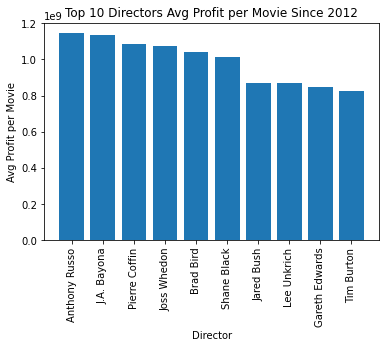

In [63]:
fig, ax = plt.subplots()

x = top10_dirs_profit.index
y = top10_dirs_profit['worldwide_profit']

ax.set_xlabel("Director")
ax.set_ylabel("Avg Profit per Movie")
ax.set_title("Top 10 Directors Avg Profit per Movie Since 2012")

plt.xticks(rotation=90)

ax.bar(x,y)

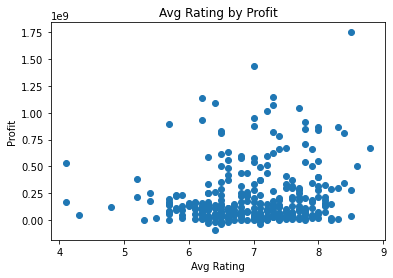

In [59]:
fig, ax = plt.subplots()

x = df_tn_imdb_filt['averagerating']
y = df_tn_imdb_filt['worldwide_profit']

ax.set_xlabel("Avg Rating")
ax.set_ylabel("Profit")
ax.set_title("Avg Rating by Profit")



ax.scatter(x,y)

In [61]:
df_tn_imdb_filt['averagerating'].corr(df_tn_imdb_filt['worldwide_profit'])

0.14375206103201144

In [62]:
df_tn_imdb_filt['production_budget'].corr(df_tn_imdb_filt['worldwide_profit'])

0.6237389744636805